## Introduction
In this notebook, I will be examining data from two historical datasets about domestic fuel use in the United States. These cover the period 1960-1970, at the census tract level, and of course are not entirely complete. They are made available through the National Historical GIS, a project of IPUMS. For those who are unfamiliar, I highly suggest checking out the homepage of https://www.ipums.org/ and also https://www.nhgis.org/ , to read more. 

The datasets from which we undertake our analysis can be found below:

* Jonathan Schroeder, David Van Riper, Steven Manson, Katherine Knowles, Tracy Kugler, Finn Roberts, and Steven Ruggles. 
        IPUMS National Historical Geographic Information System: Version 20.0 
        1960 Census: Population & Housing Data. Minneapolis, MN: IPUMS. 2025. 
        http://doi.org/10.18128/D050.V20.0

* Jonathan Schroeder, David Van Riper, Steven Manson, Katherine Knowles, Tracy Kugler, Finn Roberts, and Steven Ruggles. 
        IPUMS National Historical Geographic Information System: Version 20.0 
        1970 Census: Count 4H - Sample-Based Housing Data. Minneapolis, MN: IPUMS. 2025. 
        http://doi.org/10.18128/D050.V20.0

Pre-processing of this data for cleanliness and to combine it with shapefiles, also downloaded from NHGIS, was performed earlier. The scripts can respectively be found at /scripts/data_prep.R and /scripts/shapefiles.R. 

In this notebook, I will produce some rudimentary comparative analysis, mainly as a way to get a feel for regional and temporal differences in fuel use in America.

## Selection of Study Area

The datasets selected cover a variety of major cities in the U.S., and it would be unwieldy to discuss such a varied field of energy cultures and mxies. What I aim to do instead here is to reproduce the focus of my other research assistant work, during which I took a look at New York, Washington, and California. 

In [24]:
# Loading datasets
import geopandas as gpd
import pandas as pd
import os
os.chdir(r"C:\Users\jpkeb\kerosene-afterlife") # Set Directory
sixties = gpd.read_file(r"data\shapefiles\analysisready/heatingfuel1960.shp")

# Lets check out our columns
sixties.columns

Index(['NHGISST', 'NHGISCTY', 'GISJOIN', 'GISJOIN2', 'SHAPE_AREA', 'SHAPE_LEN',
       'YEAR', 'STATE', 'STATEA', 'COUNTY', 'COUNTYA', 'MSA', 'PLACE',
       'PRETRACTA', 'TRACTA', 'POSTTRCTA', 'URBAN', 'AREANAME', 'MCD60',
       'PLACEDC', 'PLACESC60', 'SF1', 'SF2', 'SF3', 'SF4', 'SF5', 'SF6',
       'GC23', 'coal', 'wood', 'utgas', 'botgas', 'elec', 'kerosene',
       'otherfuel', 'nofuel', 'total', 'pctcoal', 'pctwood', 'pctut', 'pctbot',
       'pctelec', 'pctker', 'pctoth', 'pctno', 'geometry'],
      dtype='object')

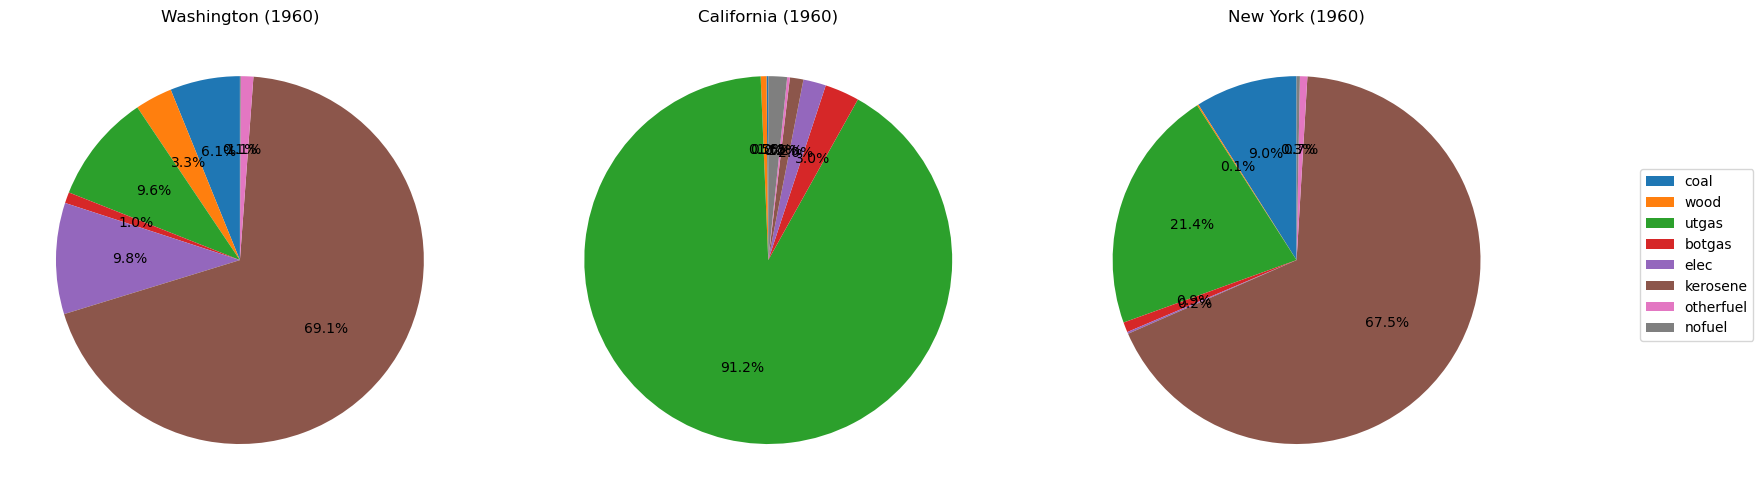

In [25]:
#Lets make some charts! 
import matplotlib.pyplot as plt
states = ["Washington", "California", "New York"]
fuel_cols = ['coal', 'wood', 'utgas', 'botgas',
             'elec', 'kerosene', 'otherfuel', 'nofuel']

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for ax, state in zip(axes, states):
    subset = sixties[sixties["STATE"] == state]
    totals = subset[fuel_cols].sum()

    wedges, texts, autotexts = ax.pie(
        totals,
        labels=None,     # turn off labels on the chart
        autopct='%1.1f%%',
        startangle=90
    )
    ax.set_title(f"{state} (1960)")

# Add a single shared legend
fig.legend(
    wedges,
    fuel_cols,
    loc="center right",
    bbox_to_anchor=(1.12, 0.5)
)

plt.tight_layout()
plt.show()


Woah, so that looks pretty cluttered! Lets get a clean read instead

In [26]:
for state in states:
    subset = sixties[sixties["STATE"] == state]

    # Sum total fuel use across all tracts
    totals = subset[fuel_cols].sum()

    # Convert to percentage shares
    perc = (totals / totals.sum()) * 100

    # Combine into one table
    rankings = (
        pd.DataFrame({"Total": totals, "Percent": perc})
        .sort_values("Total", ascending=False)
    )

    print(f"\n=== {state} Heating Fuel Rankings (1960) ===")
    print(rankings.to_string(formatters={"Percent": "{:.2f}%".format}))


=== Washington Heating Fuel Rankings (1960) ===
              Total Percent
kerosene   394783.0  69.08%
elec        55853.0   9.77%
utgas       54807.0   9.59%
coal        35090.0   6.14%
wood        18721.0   3.28%
otherfuel    6269.0   1.10%
botgas       5523.0   0.97%
nofuel        441.0   0.08%

=== California Heating Fuel Rankings (1960) ===
               Total Percent
utgas      3961673.0  91.24%
botgas      131955.0   3.04%
elec         86667.0   2.00%
nofuel       71360.0   1.64%
kerosene     51462.0   1.19%
wood         22053.0   0.51%
otherfuel    10330.0   0.24%
coal          6616.0   0.15%

=== New York Heating Fuel Rankings (1960) ===
               Total Percent
kerosene   3060995.0  67.50%
utgas       971539.0  21.42%
coal        406664.0   8.97%
botgas       40081.0   0.88%
otherfuel    29533.0   0.65%
nofuel       13112.0   0.29%
elec          7395.0   0.16%
wood          5570.0   0.12%


So now we see three pretty different mixes. Maybe lets view this graphically? We already have some percentage data, so lets see it

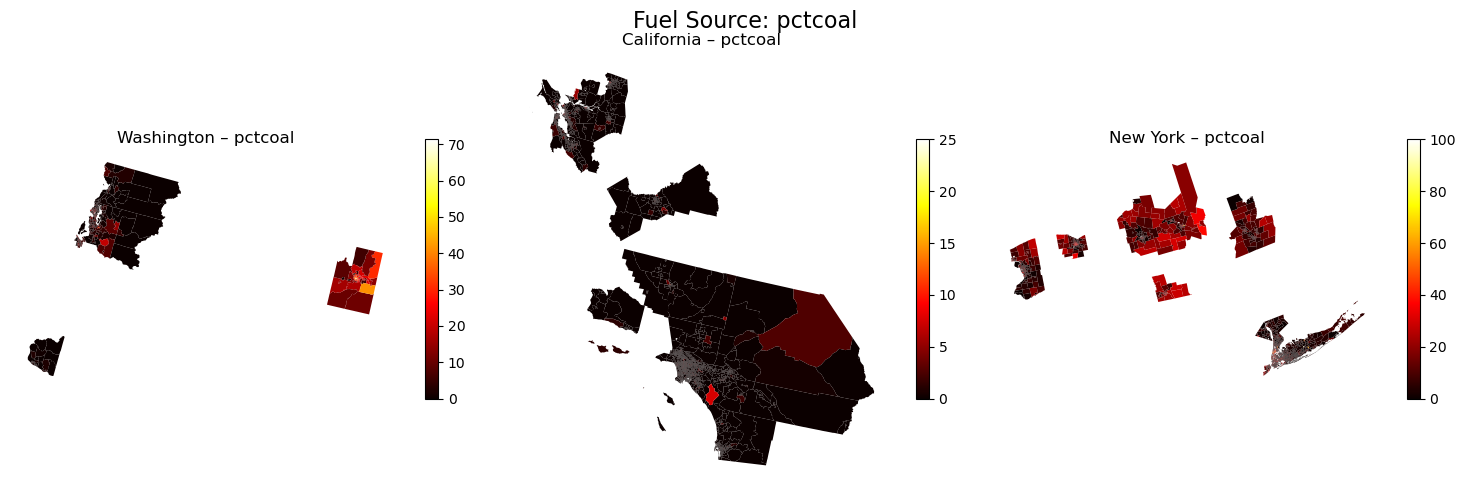

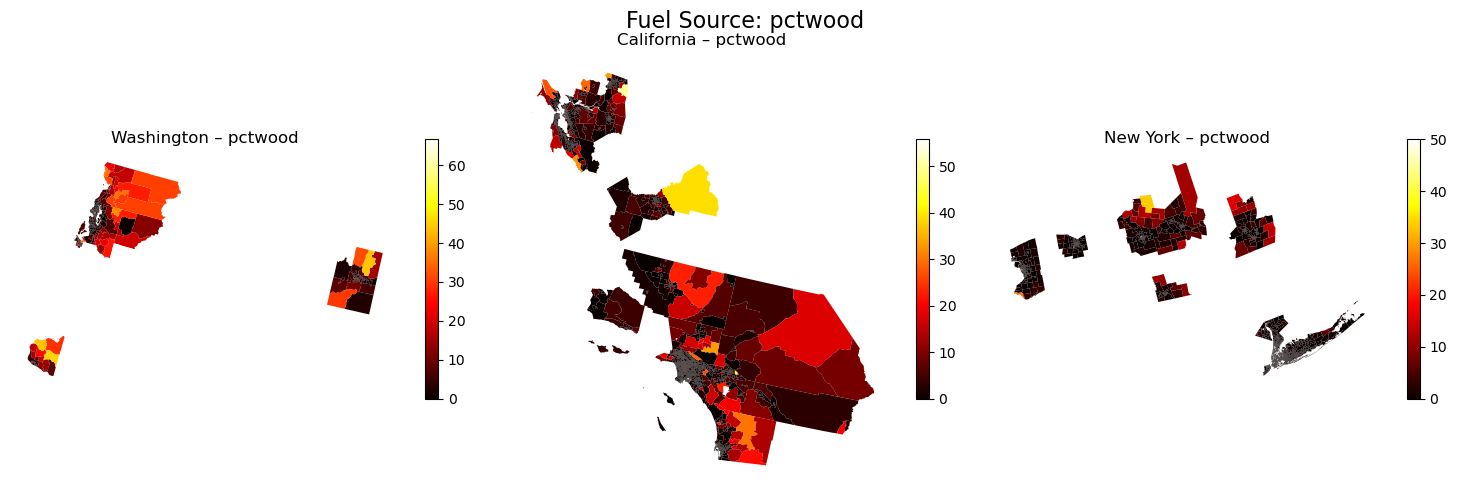

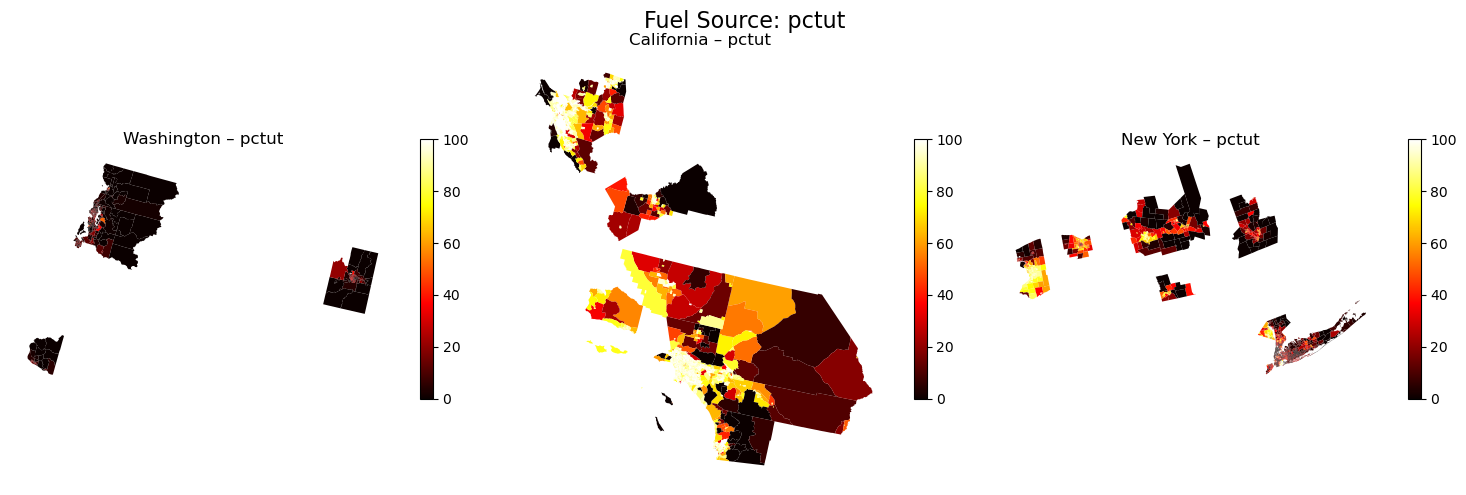

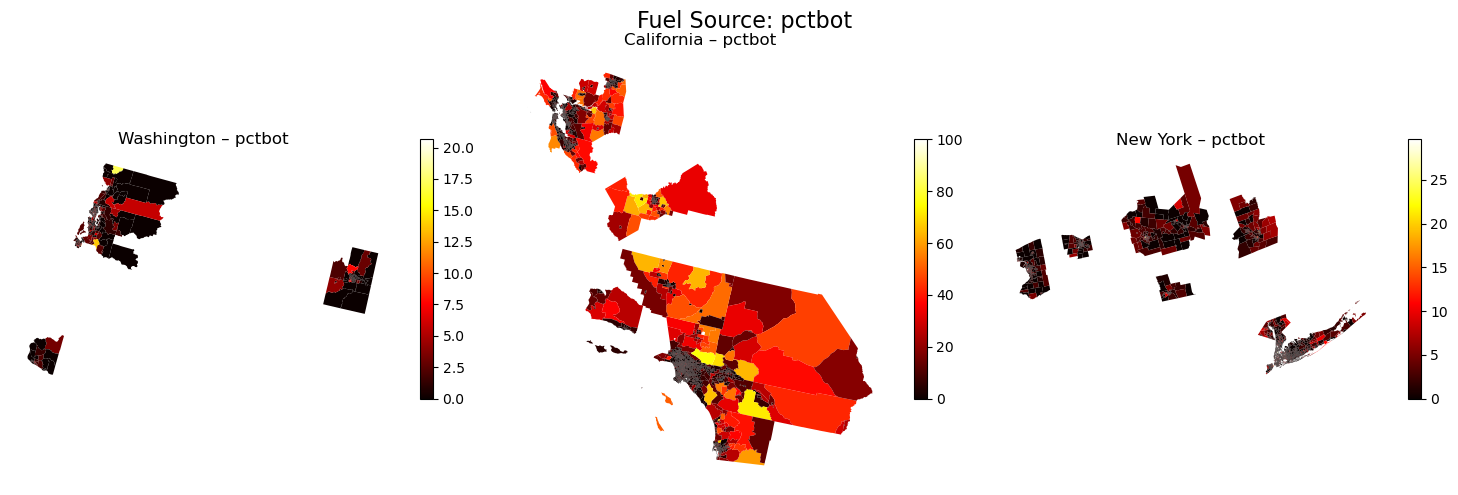

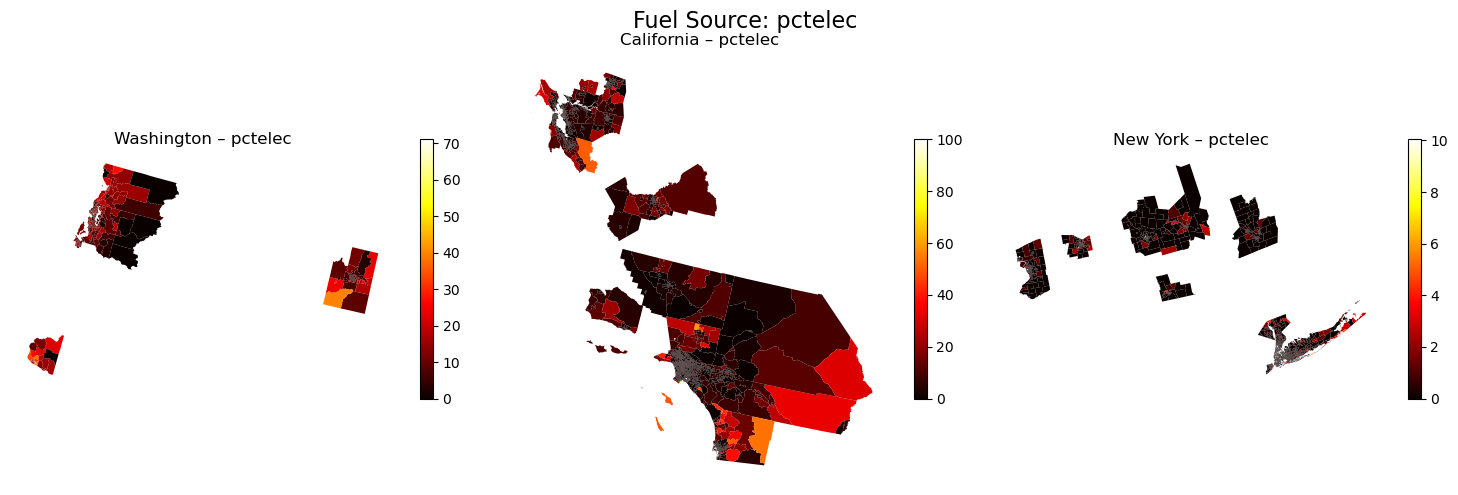

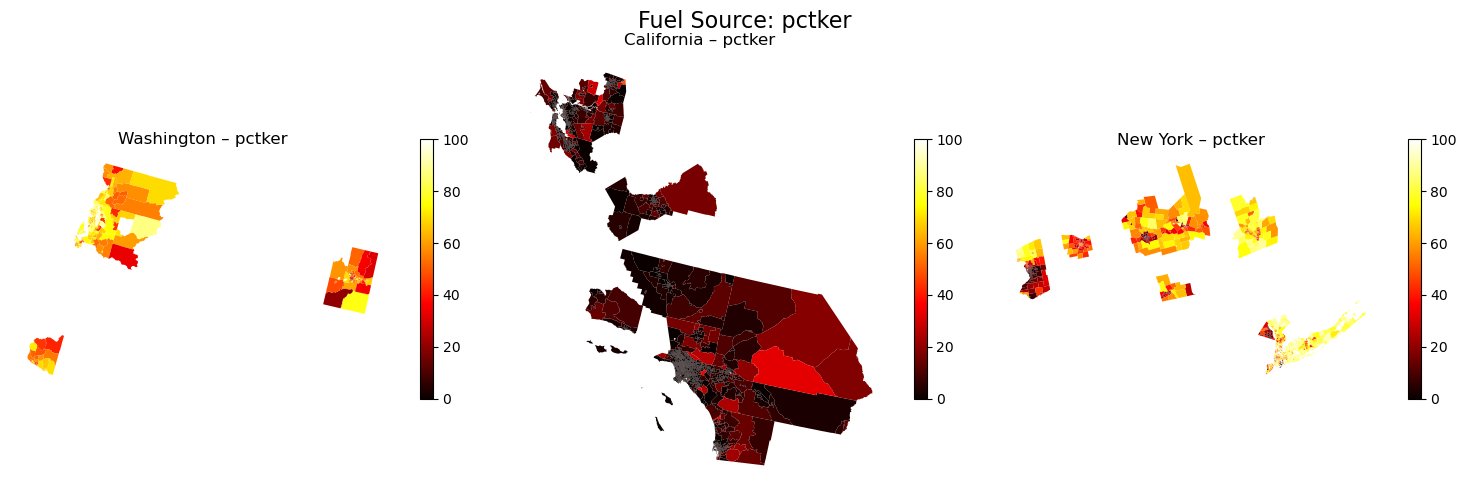

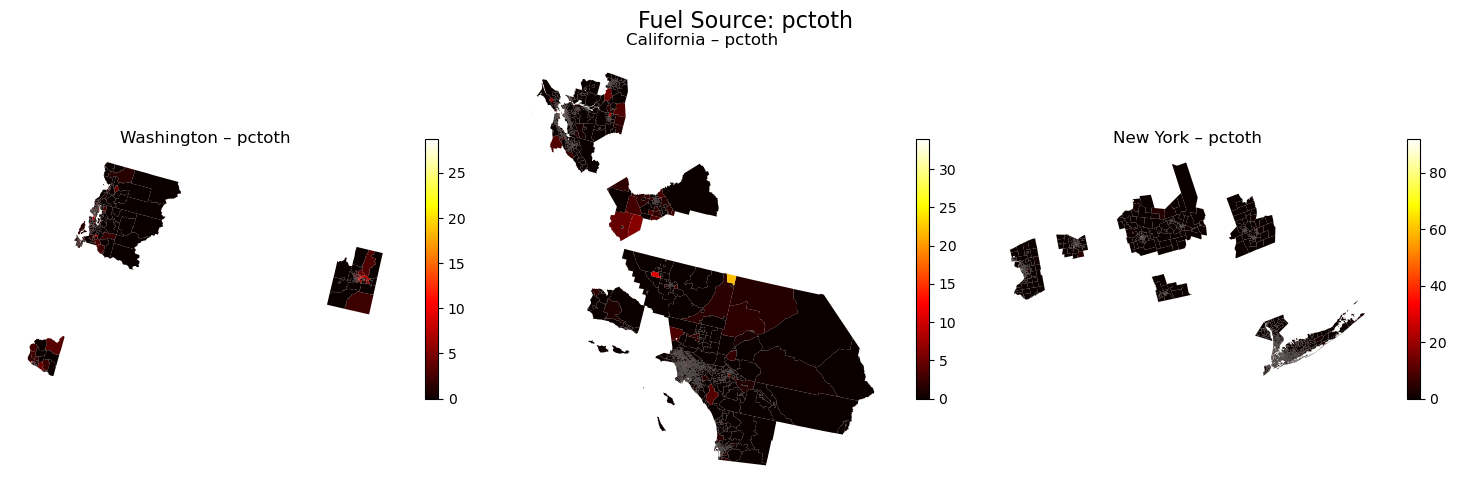

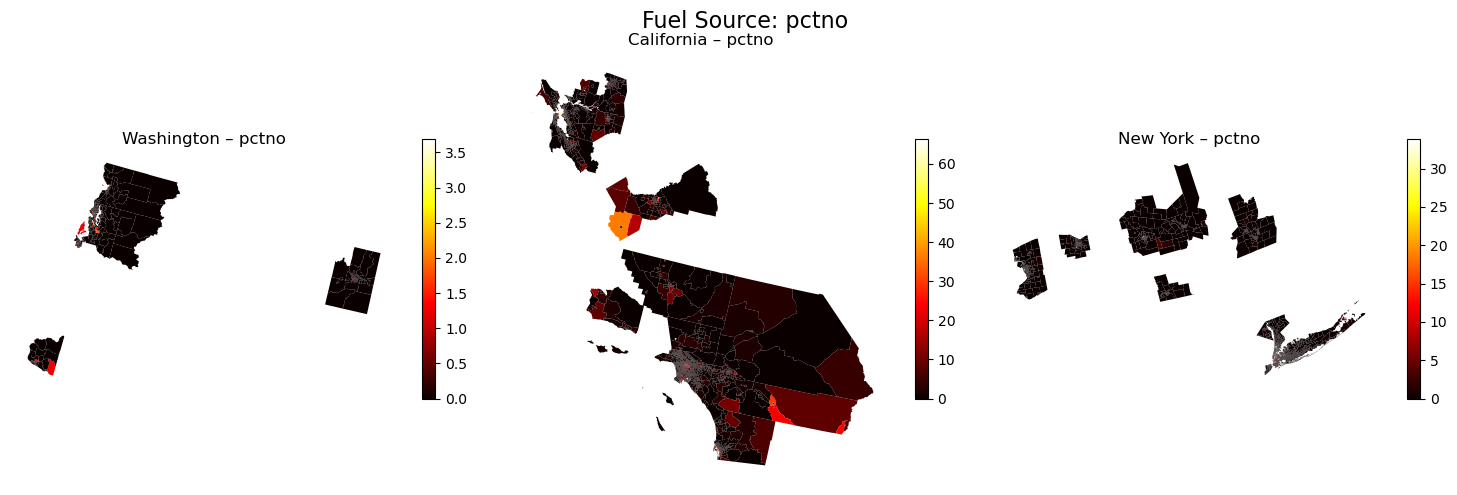

In [29]:
fuel_pct = ['pctcoal', 'pctwood', 'pctut', 'pctbot',
       'pctelec', 'pctker', 'pctoth', 'pctno']
for fuel in fuel_pct:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for ax, state in zip(axes, states):
        subset = sixties[sixties["STATE"] == state]

        subset.plot(
            column=fuel,
            cmap='hot',
            linewidth=0,
            ax=ax,
            legend=True,
            legend_kwds={'shrink': 0.6}
        )

        ax.set_title(f"{state} – {fuel}")
        ax.axis('off')

    fig.suptitle(f"Fuel Source: {fuel}", fontsize=16)
    plt.tight_layout()
    plt.show()


Ok, so we can see that we have a pretty unique geography here, and we will have to zoom in everytime for sure. I think I will make this product explorable in a later iteration, but for now lets also start doing some work with our data from the 1970s.